In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import torch

# Verifica se a GPU está disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando: {device}")

# Move tensores/modelos para a GPU
tensor_cpu = torch.tensor([1.0, 2.0, 3.0])
tensor_gpu = tensor_cpu.to(device)  # Movendo para GPU

# Modelos também precisam ser movidos
model = torch.nn.Linear(3, 1).to(device)
output = model(tensor_gpu)  # Executa na GPU

Usando: cuda


In [3]:
Asma_random_under = np.load('Treino_teste/Asma_RD_Under.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = Asma_random_under['X_treino'], Asma_random_under['X_teste'], Asma_random_under['y_treino'], Asma_random_under['y_teste'], list(Asma_random_under['feature_names'])

## Parametros e funcoes

In [4]:
param_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    # 'min_samples_split': [1, 2, 4, 6, 8, 10],
    # 'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

In [5]:
param_grid_random = {
    'criterion':  ['gini', 'entropy'],
    # 'max_depth':  [2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'n_estimators': [80, 90, 110, 120, 130, 150],
}

In [6]:
def plot_decision_tree(model, feature_names, class_names, title):
    plt.figure(figsize=(40, 15))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
    plt.title(title)
    plt.savefig("../../Graficos/Resultados_Modelos/modelo_arvore.png", dpi=600)
    plt.show()


# Modelos

### Arvore

In [7]:
grid_search = GridSearchCV( DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 0.58


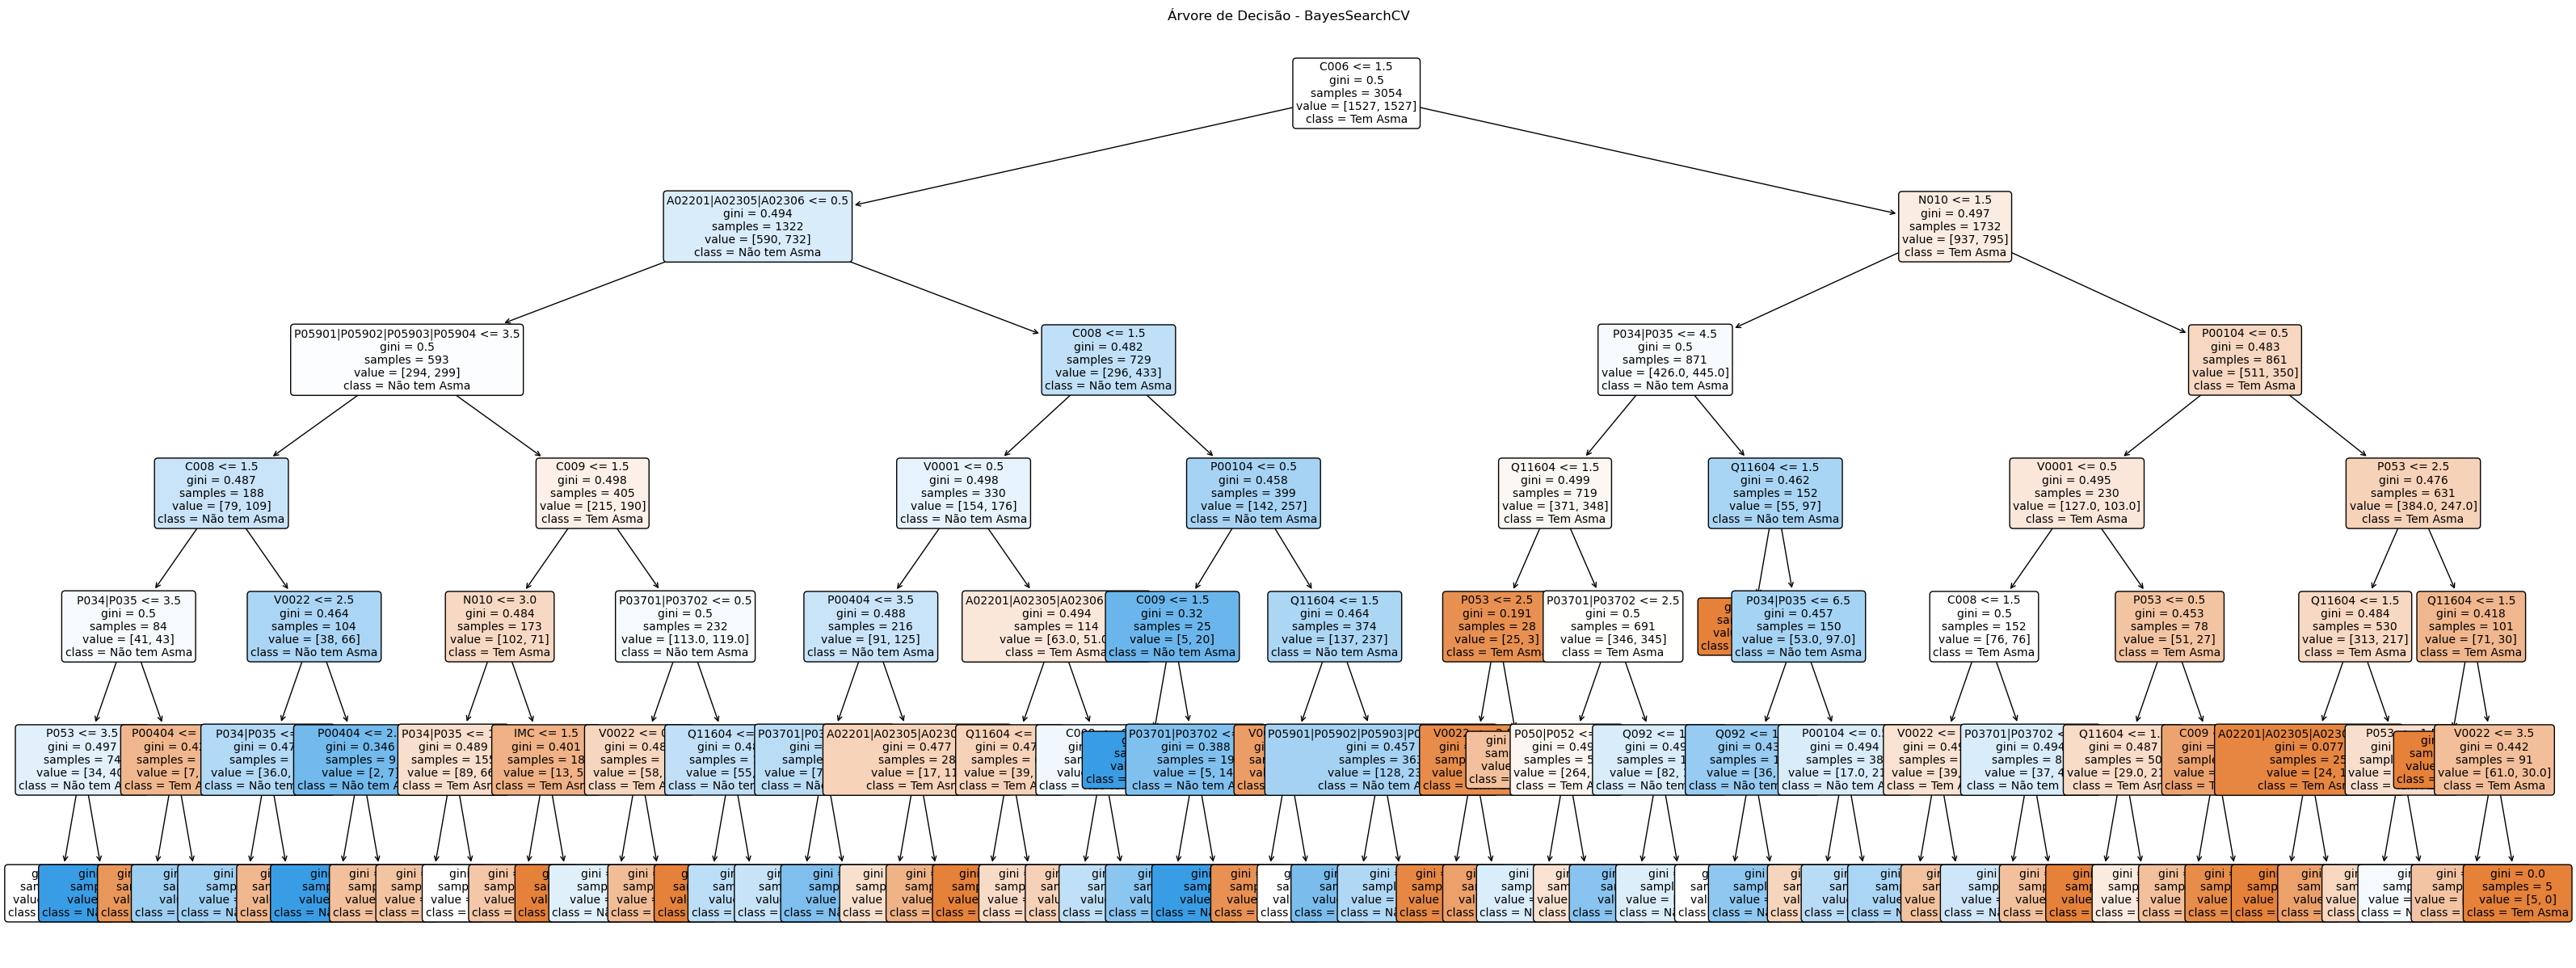

In [8]:
best_model_grid = grid_search.best_estimator_
plot_decision_tree(best_model_grid, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [9]:
previsoes_grid = best_model_grid.predict(X_teste_rd_under)
print(classification_report(y_teste_rd_under, previsoes_grid))

              precision    recall  f1-score   support

           1       0.09      0.56      0.15       629
           2       0.95      0.58      0.72      8810

    accuracy                           0.58      9439
   macro avg       0.52      0.57      0.44      9439
weighted avg       0.89      0.58      0.68      9439



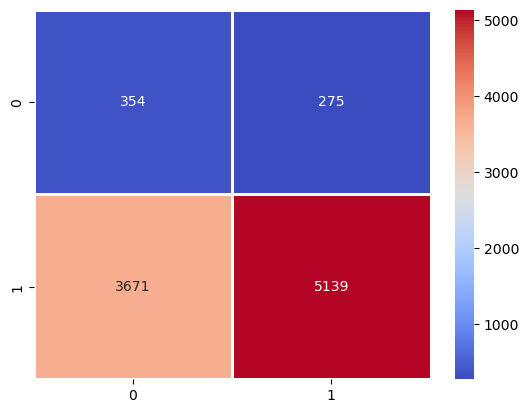

In [10]:
cfm_matrix = confusion_matrix(y_teste_rd_under,previsoes_grid)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### Random Forest

In [11]:
grid_search_rd = GridSearchCV(RandomForestClassifier(), param_grid_random, cv=5, scoring='accuracy')
grid_search_rd.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search_rd.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search_rd.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'gini', 'max_features': 0.2, 'n_estimators': 80}
Melhor pontuação de validação cruzada: 0.57


In [12]:
best_model_grid = grid_search_rd.best_estimator_
previsoes_grid_random = best_model_grid.predict(X_teste_rd_under)

In [13]:
print(classification_report(y_teste_rd_under, previsoes_grid_random))

              precision    recall  f1-score   support

           1       0.08      0.53      0.14       629
           2       0.94      0.56      0.70      8810

    accuracy                           0.56      9439
   macro avg       0.51      0.54      0.42      9439
weighted avg       0.89      0.56      0.66      9439



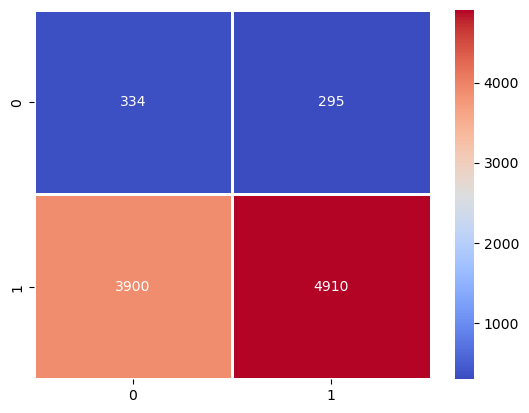

In [14]:
cfm_matrix = confusion_matrix(y_teste_rd_under,previsoes_grid_random)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

Variáveis mais relevantes:
V0022: 0.12366859264586325
A02201|A02305|A02306: 0.10113259472929222
P00404: 0.0962689971542203
P034|P035: 0.08714763937570885
C008: 0.07069869039790738
IMC: 0.07013819056023035
P00104: 0.06096540327896723
N010: 0.05971535822280499
P03701|P03702: 0.058201511691383864
C009: 0.04412730882018492
P053: 0.043711266798633214
P05901|P05902|P05903|P05904: 0.042198286327210476
V0001: 0.039037466584113924
C006: 0.030180465221963753
P050|P052: 0.02586452222199829
Q092: 0.024802367018570408
Q11604: 0.022141338950946658


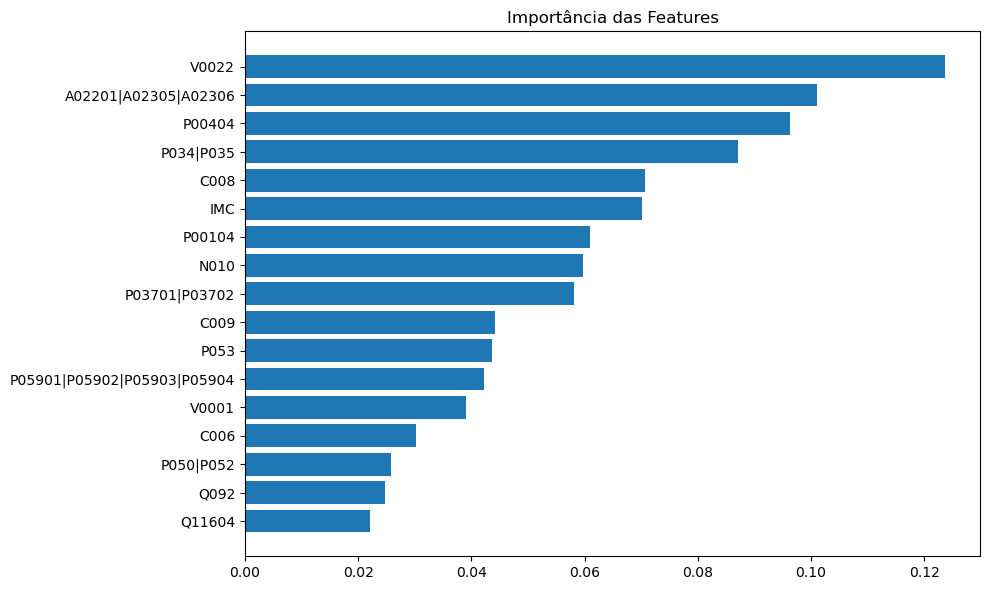

In [15]:
# Obter a importância das features
importancias = best_model_grid.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino_rd_under.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino_rd_under.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

In [16]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extraindo métricas - pegamos a primeira classe disponível no relatório
    # (ignorando 'accuracy' e 'macro avg' etc.)
    c_doente = [k for k in report.keys() if k not in ['accuracy', 'macro avg', 'weighted avg']][0]
    c_n_doente = [k for k in report.keys() if k not in ['accuracy', 'macro avg', 'weighted avg']][1]
    
    metrics_d = {
        'precision': [report[c_doente]['precision']], 
        'recall': [report[c_doente]['recall']],
        'f1-score': [report[c_doente]['f1-score']],
        'accuracy': [report['accuracy']]
    }
    metrics_n_d = {
        'precision': [report[c_n_doente]['precision']], 
        'recall': [report[c_n_doente]['recall']],
        'f1-score': [report[c_n_doente]['f1-score']],
        'accuracy': [report['accuracy']]
    }
    
    
    return metrics_d, metrics_n_d


In [17]:
doente_rf, n_doente_rf = evaluate_model(grid_search_rd, X_teste_rd_under, y_teste_rd_under)
doente, n_doente = evaluate_model(grid_search, X_teste_rd_under, y_teste_rd_under)

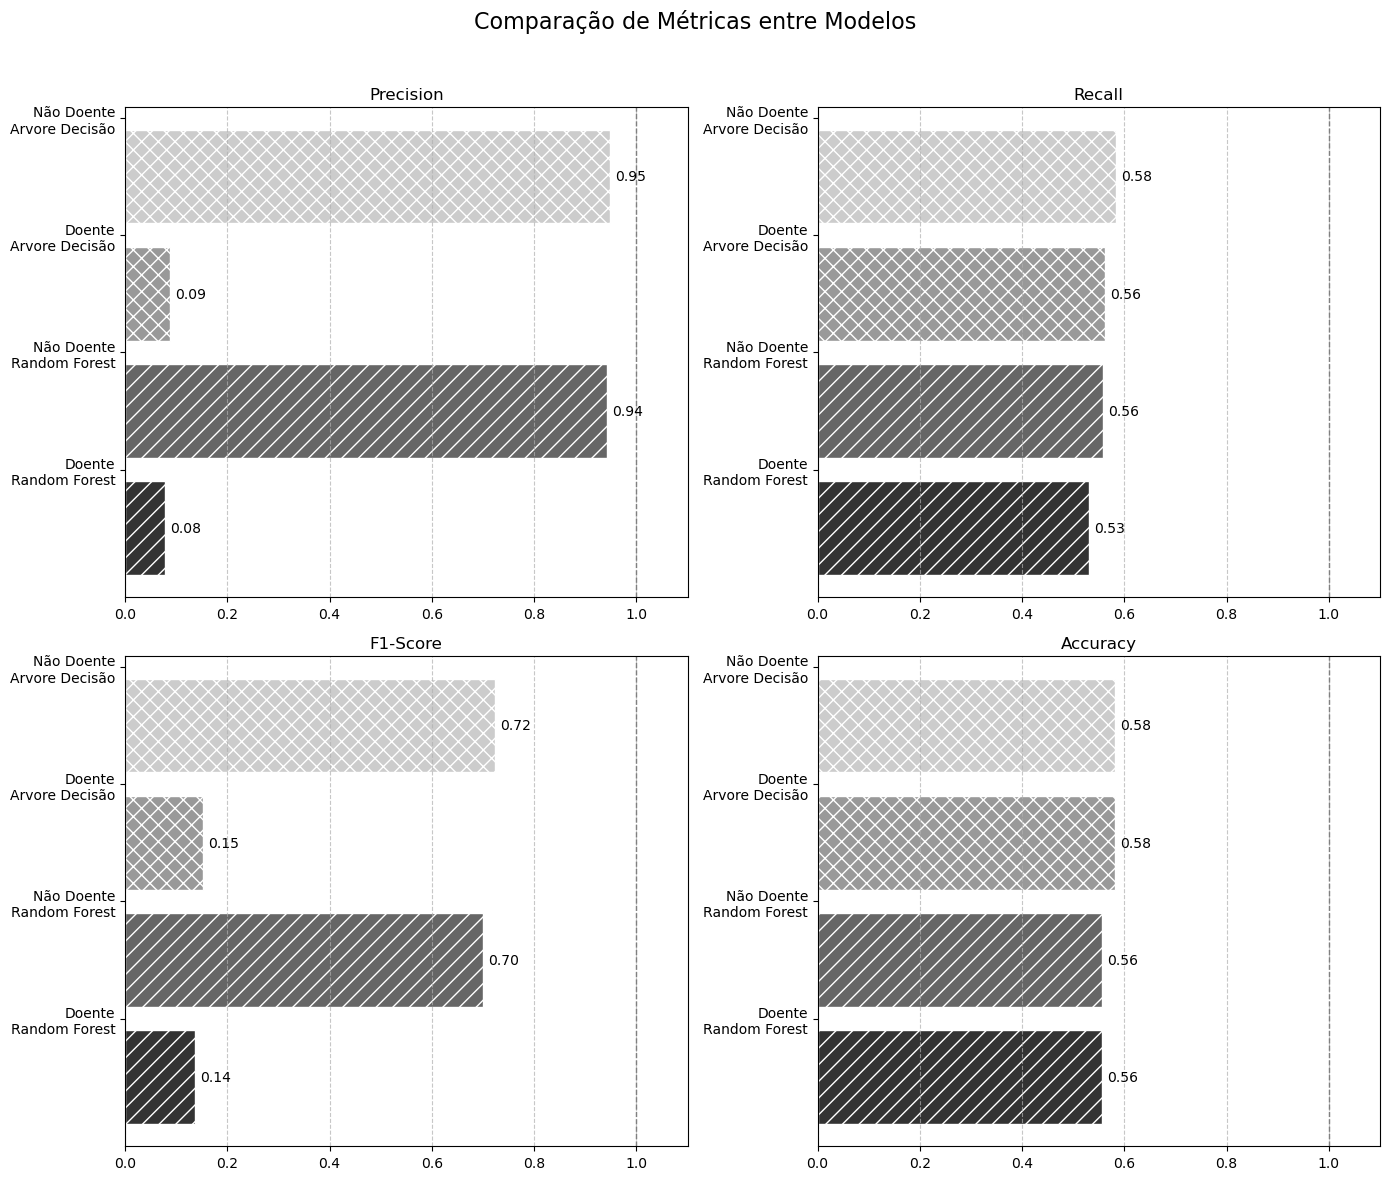

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Dados - substitua com seus valores reais
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
models = ['Random Forest', 'Arvore Decisão']  # Substitua com os nomes dos seus modelos

# Criando a figura e os subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Comparação de Métricas entre Modelos', fontsize=16)

# Dados de exemplo - substitua com seus dados reais
# Estrutura: [doente_model1, não_doente_model1, doente_model2, não_doente_model2]
data = {
    'Precision': [
        doente_rf['precision'][0], n_doente_rf['precision'][0],
        doente['precision'][0], n_doente['precision'][0]
    ],
    'Recall': [
        doente_rf['recall'][0], n_doente_rf['recall'][0],
        doente['recall'][0], n_doente['recall'][0]
    ],
    'F1-Score': [
        doente_rf['f1-score'][0], n_doente_rf['f1-score'][0],
        doente['f1-score'][0], n_doente['f1-score'][0]
    ],
    'Accuracy': [
        doente_rf['accuracy'][0], n_doente_rf['accuracy'][0],
        doente['accuracy'][0], n_doente['accuracy'][0]
    ]
}

# Cores para as barras
patterns = ['//', '//', 'xx', 'xx']  # Diferentes padrões de hachura
gray_shades = ['#333333', '#666666', '#999999', '#cccccc']   # Tons de cinza

# Plotando cada métrica
for ax, metric in zip(axes.flatten(), metrics):
    values = data[metric]
    
    # Posições das barras
    y = np.arange(len(models) * 2)
    
    # Plotando barras
    bars = ax.barh(y, values, color=gray_shades, hatch=patterns, edgecolor='white')
    
    # Adicionando valores nas barras
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{width:.2f}',
                va='center', ha='left')
    
    # Configurações do eixo Y
    ax.set_yticks([0.5, 1.5, 2.5, 3.5])
    ax.set_yticklabels([
        f'Doente\n{models[0]}', f'Não Doente\n{models[0]}',
        f'Doente\n{models[1]}', f'Não Doente\n{models[1]}'
    ])
    
    # Títulos e limites
    ax.set_title(metric)
    ax.set_xlim(0, 1.1)
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Linha vertical em 1.0
    ax.axvline(x=1.0, color='gray', linestyle='--', linewidth=1)

# Ajustando layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuste para o título principal
plt.savefig("../../Graficos/Resultados_Modelos/resultados_rf_ad.png", dpi=300)
plt.show()